# Simon's Problem

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram

import warnings
warnings.simplefilter('ignore')

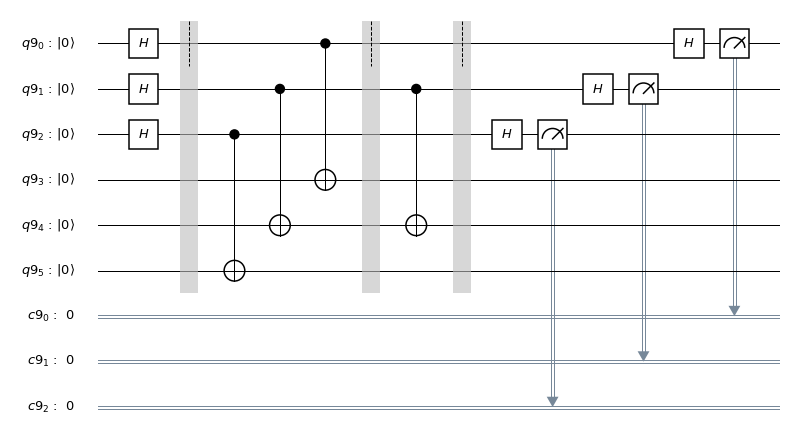

In [34]:
n = 3

qr = QuantumRegister(n*2) # 4 qubit register
cr = ClassicalRegister(n) # 1 classical register
circ = QuantumCircuit(qr, cr) # Quantum Circuit on q

for i in range(0, n):
    circ.h(qr[i])

circ.barrier()

for i in range(0, n):
    circ.cx(qr[i], qr[n+i])
circ.barrier()
secret = ""
for i in range(0, n):
    secret += str(random.randint(0, 10000)%2)

s = "010" #temp val

#xor s to register 2 (temp).
for i, c in enumerate(s):
    if c == '1':
        circ.cx(qr[i], qr[n+i])

# TO DO, rest of black box. maybe

circ.barrier()

for i in range(0, n):
    circ.h(qr[i])
    circ.measure(qr[i], cr[i])

circ.draw(output='mpl')

In [35]:
simulator = Aer.get_backend('qasm_simulator')
secret = np.ones(n)
dim = 0
count = {}
while (True):
    result = execute(circ, simulator, shots=1).result()
    temp = result.get_counts(circ)
    mes = next(iter(temp))
    print(mes, count)
    if mes in count:
        count[mes] = count[mes] + 1
    else:
        count.update(temp)
        for i in range(n):
            if secret[i] == 1  and mes[i] == '1':
                dim = dim + 1
                secret[i] = 0
            if (dim == n-1):
                break
        if (dim == n-1):
            break
        
count, dim, secret

000 {}
000 {'000': 1}
001 {'000': 2}
100 {'000': 2, '001': 1}


({'000': 2, '001': 1, '100': 1}, 2, array([0., 1., 0.]))

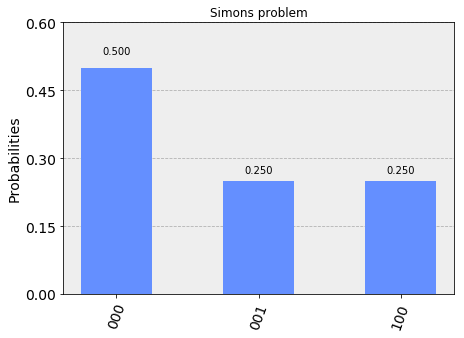

In [36]:
plot_histogram(count, title='Simons problem')